In [4]:
import requests
import os
import zipfile
import pandas as pd
import chardet
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
import numpy as np
pd.set_option('max_colwidth',None)

In [10]:
#https://stackoverflow.com/questions/34561746/downloading-a-csv-gz-file-from-url-in-python
#https://stackoverflow.com/questions/3451111/unzipping-files-in-python

l_urls = ['https://data.world/exercises/cluster-analysis-exercise-2/file/CollegeScorecard.csv',
         'https://data.world/exercises/cluster-analysis-exercise-2/file/CollegeScorecardDataDictionary-09-12-2015.csv']
l_filenames = [url.split('/')[-1] for url in l_urls]
f_path = './'

for url, f_name in zip(l_urls, l_filenames):
    print(url)
    with open(f_name,'wb') as f:
        r = requests.get(url)
        f.write(r.content)


https://data.world/exercises/cluster-analysis-exercise-2/workspace/file?filename=CollegeScorecard.csv
https://data.world/exercises/cluster-analysis-exercise-2/file/CollegeScorecardDataDictionary-09-12-2015.csv


OSError: [Errno 22] Invalid argument: 'https://data.world/exercises/cluster-analysis-exercise-2/file/CollegeScorecardDataDictionary-09-12-2015.csv'

In [3]:
# for f_name in l_filenames:
#     with open(f_path+f_name,'rb') as f_raw:
#         f_line = f_raw.readline()
#         encoding = chardet.detect(f_line)
#     print (encoding)

In [2]:
df_coll = pd.read_csv('CollegeScorecard.csv',delimiter=',',low_memory=False)

In [3]:
df_colldd = pd.read_csv('CollegeScorecardDataDictionary-09-12-2015.csv',delimiter=',',low_memory=False)

In [7]:
l_SAT = [col for col in list(df_coll.columns) if 'SAT' in col]
df_coll[l_SAT].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SATVR25      1301 non-null   float64
 1   SATVR75      1301 non-null   float64
 2   SATMT25      1315 non-null   float64
 3   SATMT75      1315 non-null   float64
 4   SATWR25      793 non-null    float64
 5   SATWR75      793 non-null    float64
 6   SATVRMID     1301 non-null   float64
 7   SATMTMID     1315 non-null   float64
 8   SATWRMID     793 non-null    float64
 9   SAT_AVG      1420 non-null   float64
 10  SAT_AVG_ALL  1531 non-null   float64
dtypes: float64(11)
memory usage: 670.7 KB


In [6]:
df_coll.shape

(7804, 1725)

In [7]:
df_coll.dtypes.value_counts()

float64    1539
object      174
int64        12
dtype: int64

In [8]:
df_coll.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,locale2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,...,count_wne_indep0_p6,count_wne_indep1_p6,count_wne_male0_p6,count_wne_male1_p6,gt_25k_p6,mn_earn_wne_inc1_p6,mn_earn_wne_inc2_p6,mn_earn_wne_inc3_p6,mn_earn_wne_indep0_inc1_p6,mn_earn_wne_indep0_p6,mn_earn_wne_indep1_p6,mn_earn_wne_male0_p6,mn_earn_wne_male1_p6,count_nwne_p7,count_wne_p7,mn_earn_wne_p7,sd_earn_wne_p7,gt_25k_p7,count_nwne_p8,count_wne_p8,mn_earn_wne_p8,md_earn_wne_p8,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,LO_INC_RPY_3YR_RT_SUPP,MD_INC_RPY_3YR_RT_SUPP,HI_INC_RPY_3YR_RT_SUPP,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools Commission on Colleges,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7834,-86.5685,18.0,9.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8989,0.8989,370.0,450.0,350.0,450.0,NaN,NaN,410.0,400.0,NaN,15.0,19.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19500,33611.5,373.1565536,0.44471387,0.448163265,0.446488294,0.422018349,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools Commission on Colleges,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,NaN,0,1,1,3,4,1,1,5,12.0,NaN,33.5022,-86.8092,15.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8673,0.8673,520.0,640.0,520.0,650.0,NaN,NaN,580.0,585.0,NaN,22.0,28.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,23117,256.6460899,0.756266667,0.724256293,0.770134228,0.818059299,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools Commission on Colleges,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0))/Amridge%20University/Freshman-Students,NaN,0,1,1,3,4,2,1,5,12.0,NaN,32.3626,-86.1740,21.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500,PrivacySuppressed,PrivacySuppressed,0.647249191,0.597701149,0.709090909,PrivacySuppressed,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools Commission on Colleges,www.uah.edu,finaid.uah.edu/,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7228,-86.6384,15.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8062,0.8062,510.0,640.0,510.0,650.0,NaN,NaN,575.0,580.0,NaN,23.0,29.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500,24738,274.6425129,0.781997919,0.721404304,0.8247

In [9]:
df_colldd.fillna('',inplace=True)

In [11]:
df_colldd.head(20)

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,,root,id,UNITID,integer,,,,,IPEDS,
1,8-digit OPE ID for institution,,root,ope8_id,OPEID,integer,,,,,IPEDS,
2,6-digit OPE ID for institution,,root,ope6_id,opeid6,integer,,,,,IPEDS,
3,Institution name,2013,school,name,INSTNM,string,,,,Y,IPEDS,
4,City,2013,school,city,CITY,string,,,,Y,IPEDS,
5,State postcode,2013,school,state,STABBR,string,,,,Y,IPEDS,
6,ZIP code,2013,school,zip,ZIP,integer,,,,Y,IPEDS,
7,Accreditor for institution,,school,accreditor,AccredAgency,string,,,,,IPEDS,
8,URL for institution's homepage,2013,school,school_url,INSTURL,string,,,,Y,IPEDS,
9,URL for institution's net price calculator,2013,school,price_calculator_url,NPCURL,string,,,,Y,IPEDS,


In [12]:
df_colldd[df_colldd['API data type'] == 'float']

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
115,Latitude,,root,location.lat,LATITUDE,float,,,,,IPEDS,
116,Longitude,,root,location.lon,LONGITUDE,float,,,,,IPEDS,
266,Admission rate,2013,admissions,admission_rate.overall,ADM_RATE,float,,,,Y,IPEDS,
267,Admission rate for all campuses rolled up to the 6-digit OPE ID,,admissions,admission_rate.by_ope_id,ADM_RATE_ALL,float,,,,,IPEDS,
268,25th percentile of SAT scores at the institution (critical reading),,admissions,sat_scores.25th_percentile.critical_reading,SATVR25,float,,,,Y,IPEDS,
...,...,...,...,...,...,...,...,...,...,...,...,...
1948,"3-year repayment rate for non-first-generation students, suppressed for n=30",,repayment,3_yr_repayment_suppressed.non_first_generation_students,NOTFIRSTGEN_RPY_3YR_RT_SUPP,float,,,,,NSLDS,
1949,"150% completion rate for less-than-four-year institutions, pooled in two-year rolling averages and suppressed for small n size",2009 and 2010 cohorst measured in 2012 and 2013,completion,,C150_L4_POOLED_SUPP,float,,,,,IPEDS,
1950,"150% completion rate for four-year institutions, pooled in two-year rolling averages and suppressed for small n size. For four year school, students are considered to have graduated ""on time"" if they graduate within 6 years.",2006 and 2007 cohorts measured in 2012 and 2013,completion,rate_suppressed.four_year,C150_4_POOLED_SUPP,float,,,,Y,IPEDS,
1951,"200% completion rate for less-than-four-year institutions, pooled in two-year rolling averages and suppressed for small n size. For two year schools, students are considered to have graduated ""on time"" if they graduate within 4 years.",2008 and 2009 cohort measured in 2012 and 2013,completion,rate_suppressed.lt_four_year,C200_L4_POOLED_SUPP,float,,,,Y,IPEDS,


In [13]:
df_coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 1725 entries, UNITID to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(1539), int64(12), object(174)
memory usage: 97.5+ MB


In [14]:
df_coll.dtypes[df_coll.dtypes == 'int64'].reset_index()

,index,0
0,UNITID,int64
1,OPEID,int64
2,opeid6,int64
3,HCM2,int64
4,main,int64
5,NUMBRANCH,int64
6,PREDDEG,int64
7,HIGHDEG,int64
8,CONTROL,int64
9,st_fips,int64


## I'm only interested in colleges and univerisities.  Let's ignore the certificate bestowing, 'barber shop' type schools
<p>'PREDDEG' holds the type of degree.  0 is not classified and 1 is a certificate.  I'm interested in 2 and above

In [16]:
df_coll.PREDDEG.value_counts()

1    3326
3    2133
2    1534
0     519
4     292
Name: PREDDEG, dtype: int64

In [17]:
df_coll[(df_coll.PREDDEG < 2)].INSTNM.sample(50)

4135                                        Academy of Careers and Technology
3681                                      William Moore College of Technology
867                                        Washington-Holmes Technical Center
4328                                             ETI School of Skilled Trades
6675                                 Preferred College of Nursing-Los Angeles
3350                                     Pennsylvania Institute of Technology
7085                                    Regency Beauty Institute-Newport News
7146                                        SAE Institute of Technology-Miami
5056                       Wayne Finger Lakes BOCES-Practical Nursing Program
6598                                            InterCoast Colleges-Roseville
1546                                   Northshore Technical Community College
7691                                 McCann School of Business and Technology
1030                               City Colleges of Chicago-Malc

In [18]:
df_coll = df_coll[(df_coll.PREDDEG >= 2)]

In [20]:
print('Shape of df_coll_no_nans:',df_coll.shape)
print('Columns in df_coll_no_nans:',df_coll.columns)

Shape of df_coll_no_nans: (3959, 1725)
Columns in df_coll_no_nans: Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'AccredAgency', 'INSTURL', 'NPCURL',
       ...
       'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP',
       'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=1725)


## Identify continuous variable data elements that have a low number of non-nan entries

#### Isolate the Float variables

In [21]:
list(df_colldd[df_colldd['API data type'] == 'float']['NAME OF DATA ELEMENT']);

#### Remove float data elements in data dictionary <b>df_colldd</b> that are not in the data <b>df_coll</b>

In [22]:
float_cols = list(df_colldd[df_colldd['API data type'] == 'float']['VARIABLE NAME'])
float_cols = np.setdiff1d(float_cols,['C200_L4_POOLED_SUPP', 'C200_4_POOLED_SUPP', 'C150_L4_POOLED_SUPP', 'C150_4_POOLED_SUPP'])

#### Identify the percentage of nans in each data element

In [23]:
(df_coll[float_cols].isna().sum())/len(df_coll)

ACTCM25           0.662541
ACTCM75           0.662541
ACTCMMID          0.662541
ACTEN25           0.707249
ACTEN75           0.707249
                    ...   
sd_earn_wne_p7    1.000000
sd_earn_wne_p8    1.000000
sd_earn_wne_p9    1.000000
unemp_rate        1.000000
veteran           1.000000
Length: 1196, dtype: float64

#### Identify data elements with low number of nans

In [25]:
((df_coll[float_cols].isna().sum())/len(df_coll))[((df_coll[float_cols].isna().sum())/len(df_coll)) < .1];

APPL_SCH_PCT_GE2    0.046224
APPL_SCH_PCT_GE3    0.046224
APPL_SCH_PCT_GE4    0.046224
APPL_SCH_PCT_GE5    0.046224
CDR3                0.004041
                      ...   
UGDS_NHPI           0.071483
UGDS_NRA            0.071483
UGDS_UNKN           0.071483
UGDS_WHITE          0.071483
WDRAW_DEBT_MDN      0.081839
Length: 117, dtype: float64

#### Grab the column names with low number of nans

In [26]:
floats_cols_low_nans = list(((df_coll[float_cols].isna().sum())/len(df_coll))[((df_coll[float_cols].isna().sum())/len(df_coll)) < .1].index)

##### This shows the columns to keep

In [30]:
df_colldd[df_colldd['VARIABLE NAME'].isin(floats_cols_low_nans)]

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
115,Latitude,,root,location.lat,LATITUDE,float,,,,,IPEDS,
116,Longitude,,root,location.lon,LONGITUDE,float,,,,,IPEDS,
291,"Percentage of degrees awarded in Agriculture, Agriculture Operations, And Related Sciences.",,academics,program_percentage.agriculture,PCIP01,float,"Agriculture, Agriculture Operations, and Related Sciences",,"Agriculture, Agriculture Operations, and Related Sciences",,IPEDS,
292,Percentage of degrees awarded in Natural Resources And Conservation.,,academics,program_percentage.resources,PCIP03,float,Natural Resources and Conservation,,Natural Resources and Conservation,,IPEDS,
293,Percentage of degrees awarded in Architecture And Related Services.,,academics,program_percentage.architecture,PCIP04,float,Architecture and Related Services,,Architecture and Related Services,,IPEDS,
294,"Percentage of degrees awarded in Area, Ethnic, Cultural, Gender, And Group Studies.",,academics,program_percentage.ethnic_cultural_gender,PCIP05,float,"Area, Ethnic, Cultural, Gender, and Group Studies",,"Area, Ethnic, Cultural, Gender, and Group Studies",,IPEDS,
295,"Percentage of degrees awarded in Communication, Journalism, And Related Programs.",,academics,program_percentage.communication,PCIP09,float,"Communication, Journalism, and Related Programs",,"Communication, Journalism, and Related Programs",,IPEDS,
296,Percentage of degrees awarded in Communications Technologies/Technicians And Support Services.,,academics,program_percentage.communications_technology,PCIP10,float,Communications Technologies/Technicians and Support Services,,Communications Technologies/Technicians and Support Services,,IPEDS,
297,Percentage of degrees awarded in Computer And Information Sciences And Support Services.,,academics,program_percentage.computer,PCIP11,float,Computer and Information Sciences and Support Services,,Computer and Information Sciences and Support Services,,IPEDS,
298,Percentage of degrees awarded in Personal And Culinary Services.,,academics,program_percentage.personal_culinary,PCIP12,float,Personal and Culinary Services,,Personal and Culinary Services,,IPEDS,


#### The above list of Data Elements is reasonable for finding similar colleges.  

### Next take a look at how many unique rows or college instances are left after removing colleges with nan's in the <b>floats_cols_low</b> categories

#### First get the columns that identify the colleges to include

In [31]:
iden_cols = list(df_coll.columns[0:4])
iden_cols.append('PREDDEG')
floats_cols_low_nans_w_iden = iden_cols + floats_cols_low_nans

In [32]:
print('There are',len(df_coll[floats_cols_low_nans]),'colleges in the survey.')

There are 3959 colleges in the survey.


In [33]:
df_coll_no_nans = df_coll[floats_cols_low_nans_w_iden].dropna()
print('There are',len(df_coll[floats_cols_low_nans_w_iden].dropna()),'collegs left after removing colleges with nans.')

There are 3274 collegs left after removing colleges with nans.


#### Removing the nan's and certificate schools leaves a resonable group, but I found a second form of nan called 'PrivacySuppressed' which needs to be understood

#### look at percentages of 'PrivacySupressed' in each of the remaining columns

#### Focus on columns with more than 10% 'PrivacySuppressed' values.  Question:  Can I drop these columns?  What do they add?

In [34]:
o_PS = 'PrivacySuppressed' 

In [35]:
l_cols_w_10perprivsupp = list(((df_coll_no_nans.astype(str) == o_PS).sum()/
                               len(df_coll_no_nans)).loc[((df_coll_no_nans.astype(str) == 
                                                           o_PS).sum()/len(df_coll_no_nans) > .1)].index)

In [36]:
df_colldd[df_colldd['VARIABLE NAME'].isin(l_cols_w_10perprivsupp)]

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
1589,Three-year repayment rate for completers,,repayment,3_yr_repayment.completers,COMPL_RPY_3YR_RT,float,,,,,NSLDS,
1590,Three-year repayment rate for non-completers,,repayment,3_yr_repayment.noncompleters,NONCOM_RPY_3YR_RT,float,,,,,NSLDS,
1591,"Three-year repayment rate by family income ($0-30,000)",,repayment,3_yr_repayment.income.0_30000,LO_INC_RPY_3YR_RT,float,,,,,NSLDS,
1592,"Three-year repayment rate by family income ($30,000-75,000)",,repayment,3_yr_repayment.income.30000_75000,MD_INC_RPY_3YR_RT,float,,,,,NSLDS,
1595,Three-year repayment rate for independent students,,repayment,3_yr_repayment.independent_students,IND_RPY_3YR_RT,float,,,,,NSLDS,
1597,Three-year repayment rate for students who never received a Pell grant while at school,,repayment,3_yr_repayment.no_pell_grant,NOPELL_RPY_3YR_RT,float,,,,,NSLDS,
1598,Three-year repayment rate for females,,repayment,3_yr_repayment.female_students,FEMALE_RPY_3YR_RT,float,,,,,NSLDS,
1599,Three-year repayment rate for males,,repayment,3_yr_repayment.male_students,MALE_RPY_3YR_RT,float,,,,,NSLDS,
1601,Three-year repayment rate for students who are not first-generation,,repayment,3_yr_repayment.non_first_generation_students,NOTFIRSTGEN_RPY_3YR_RT,float,,,,,NSLDS,
1630,"Percentage of aided students whose family income is between $0-$30,000",,student,,INC_PCT_LO,float,,,,,NSLDS,


In [37]:
grt15pct_PS_cols = list(((df_coll_no_nans.astype(str) == o_PS).sum()/
                         len(df_coll_no_nans))[((
                         df_coll_no_nans.astype(str) == o_PS).sum()/
                         len(df_coll_no_nans))>.1].index)
((df_coll_no_nans.astype(str) == o_PS).sum()/len(df_coll_no_nans))[((df_coll_no_nans.astype(str) == o_PS).sum()/len(df_coll_no_nans))>.1]

COMPL_RPY_3YR_RT          0.663409
DEP_INC_PCT_H1            0.542456
DEP_INC_PCT_H2            0.492059
DEP_INC_PCT_LO            0.127673
DEP_INC_PCT_M1            0.209530
DEP_INC_PCT_M2            0.303910
FEMALE_RPY_3YR_RT         0.282224
HI_INC_RPY_3YR_RT_SUPP    0.121869
INC_PCT_H1                0.482590
INC_PCT_H2                0.475260
INC_PCT_LO                0.401344
INC_PCT_M1                0.418754
INC_PCT_M2                0.431888
IND_DEBT_MDN              0.263592
IND_INC_PCT_H1            0.542456
IND_INC_PCT_H2            0.492059
IND_INC_PCT_LO            0.127673
IND_INC_PCT_M1            0.209530
IND_INC_PCT_M2            0.303910
IND_RPY_3YR_RT            0.519853
LO_INC_DEBT_MDN           0.126756
LO_INC_RPY_3YR_RT         0.213806
MALE_DEBT_MDN             0.153635
MALE_RPY_3YR_RT           0.523213
MD_INC_RPY_3YR_RT         0.272450
NONCOM_RPY_3YR_RT         0.452657
NOPELL_DEBT_MDN           0.282529
NOPELL_RPY_3YR_RT         0.627367
NOTFIRSTGEN_RPY_3YR_

##### My inclination was to drop all columns over 10% and to drop universities that do not provide info on low income students.  However that list includes Yale, University of Chicago, Tufts, Boston College, which are schools I want to include.  So, I will just drop the above columns that have more than 10% PrivacySuppressed.

In [38]:
df_coll_no_nans.columns

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'PREDDEG', 'APPL_SCH_PCT_GE2',
       'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4', 'APPL_SCH_PCT_GE5', 'CDR3',
       ...
       'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP',
       'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WDRAW_DEBT_MDN'],
      dtype='object', length=122)

#### Remove the columns with greater than 15% nan's

In [39]:
df_coll_no_nans_grtr15pct_PS =  df_coll_no_nans[list(np.setdiff1d(df_coll_no_nans.columns,grt15pct_PS_cols))]
df_coll_no_nans_grtr15pct_PS.columns

Index(['APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4',
       'APPL_SCH_PCT_GE5', 'CDR3', 'COMPL_RPY_3YR_RT_SUPP', 'DEBT_MDN',
       'DEBT_MDN_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'DEP_STAT_PCT_IND',
       'FEMALE_DEBT_MDN', 'FEMALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_DEBT_MDN',
       'FIRSTGEN_RPY_3YR_RT_SUPP', 'GRAD_DEBT_MDN', 'GRAD_DEBT_MDN10YR',
       'GRAD_DEBT_MDN10YR_SUPP', 'GRAD_DEBT_MDN_SUPP', 'IND_RPY_3YR_RT_SUPP',
       'INSTNM', 'LATITUDE', 'LONGITUDE', 'LO_INC_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'MD_INC_DEBT_MDN', 'MD_INC_RPY_3YR_RT_SUPP',
       'NONCOM_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'OPEID',
       'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS',
       'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11',
       'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22',
       'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP2

##### These are the columns with between 0 and 10% O_PS.  Can I just drop colleges with o_PS here or do I lose valuable schools?

In [40]:
l_cols_less10pct_o_PS = (((df_coll_no_nans_grtr15pct_PS.astype(str) ==
                          o_PS).sum()/len(df_coll_no_nans_grtr15pct_PS))
                         [(0 < ((df_coll_no_nans_grtr15pct_PS.astype(str) == 
                         o_PS).sum()/len(df_coll_no_nans))) &
                         (((df_coll_no_nans_grtr15pct_PS.astype(str) == o_PS).sum()/
                         len(df_coll_no_nans_grtr15pct_PS))<.1)].index)
(((df_coll_no_nans_grtr15pct_PS.astype(str) == o_PS).sum()/
                          len(df_coll_no_nans_grtr15pct_PS))
                          [(0 < ((df_coll_no_nans_grtr15pct_PS.astype(str) == o_PS).sum()/
                          len(df_coll_no_nans_grtr15pct_PS))) & 
                          (((df_coll_no_nans_grtr15pct_PS.astype(str) == o_PS).sum()/
                            len(df_coll_no_nans_grtr15pct_PS))<.1)])

APPL_SCH_PCT_GE2               0.003360
APPL_SCH_PCT_GE3               0.013134
APPL_SCH_PCT_GE4               0.031155
APPL_SCH_PCT_GE5               0.048564
COMPL_RPY_3YR_RT_SUPP          0.057728
DEBT_MDN                       0.008858
DEBT_MDN_SUPP                  0.005803
DEP_RPY_3YR_RT_SUPP            0.037263
DEP_STAT_PCT_IND               0.023519
FEMALE_DEBT_MDN                0.069945
FEMALE_RPY_3YR_RT_SUPP         0.024740
FIRSTGEN_DEBT_MDN              0.034209
FIRSTGEN_RPY_3YR_RT_SUPP       0.042150
GRAD_DEBT_MDN                  0.024740
GRAD_DEBT_MDN10YR              0.024740
GRAD_DEBT_MDN10YR_SUPP         0.037874
GRAD_DEBT_MDN_SUPP             0.037874
IND_RPY_3YR_RT_SUPP            0.083690
LO_INC_RPY_3YR_RT_SUPP         0.027489
MALE_RPY_3YR_RT_SUPP           0.047343
MD_INC_DEBT_MDN                0.064447
MD_INC_RPY_3YR_RT_SUPP         0.040929
NONCOM_RPY_3YR_RT_SUPP         0.029322
NOPELL_RPY_3YR_RT_SUPP         0.044288
NOTFIRSTGEN_DEBT_MDN           0.015577


##### The below shows the schools that do not provide information on the above categories.  Among them are Princeton, Colgate, Haverford, Oberlin, Princeton, Bowdoin, Wheaton, St. Mary's, St. John's, Gettysburg, Swarthmore.  

In [41]:
df = df_coll_no_nans_grtr15pct_PS[l_cols_less10pct_o_PS].copy()
df_coll_no_nans_grtr15pct_PS.loc[(df == o_PS).any(axis=1),'INSTNM']

2                                 Amridge University
6                  Central Alabama Community College
10                       Birmingham Southern College
12                         Concordia College Alabama
14                Enterprise State Community College
                            ...                     
6733                         Touro University Nevada
6815                      National Paralegal College
7012                         College America-Phoenix
7013          CollegeAmerica-Stevens Henager College
7036    Springfield College-School of Human Services
Name: INSTNM, Length: 779, dtype: object

In [43]:
schools = ['Bowdoin College','Wheaton College',"St John's College",
 "Saint Mary's College",'Oberlin College','Princeton University',
 'Swarthmore College','Gettysburg College','Colgate University',
 'Barnard College','Bowdoin College']
df_coll_no_nans_grtr15pct_PS[df_coll_no_nans_grtr15pct_PS['INSTNM'].isin(schools)]

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,COMPL_RPY_3YR_RT_SUPP,DEBT_MDN,DEBT_MDN_SUPP,DEP_RPY_3YR_RT_SUPP,DEP_STAT_PCT_IND,FEMALE_DEBT_MDN,FEMALE_RPY_3YR_RT_SUPP,FIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,GRAD_DEBT_MDN,GRAD_DEBT_MDN10YR,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,IND_RPY_3YR_RT_SUPP,INSTNM,LATITUDE,LONGITUDE,LO_INC_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,MD_INC_DEBT_MDN,MD_INC_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,NOTFIRSTGEN_DEBT_MDN,NOTFIRSTGEN_RPY_3YR_RT_SUPP,OPEID,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,PCTFLOAN,PCTPELL,PELL_RPY_3YR_RT_SUPP,PPTUG_EF,PREDDEG,RPY_3YR_RT,RPY_3YR_RT_SUPP,UG25abv,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UNITID,WDRAW_DEBT_MDN,opeid6
1180,0.805555556,0.658333333,0.529166667,0.3875,0.012,0.991471215,21179,21179,0.9796875,PrivacySuppressed,19768,0.978787879,21750,0.918918919,23000,255.34715,255.34715,23000,PrivacySuppressed,Wheaton College,41.8709,-88.0968,0.946428571,0.977564103,23250,0.981900452,0.943820225,0.979357798,21147.5,0.983388704,178100,0.083098592,0.078873239,0.004225352,0.916901409,0.0,0.0077,0.0000,0.0000,0.0537,0.0,0.0061,0.0,0.0537,0.0092,0.0,0.0353,0.0,0.0000,0.0828,0.0,0.0,0.0629,0.0383,0.0,0.0153,0.0,0.0291,0.0782,0.0613,0.0,0.0583,0.0,0.0000,0.1411,0.0,0.0,0.0,0.0,0.0859,0.0613,0.0859,0.0337,0.5068,0.2097,0.971830986,0.0161,3,0.976887519,0.976887519,0.0086,0.0451,0.0008,0.0820,0.0215,0.0493,0.0000,0.0186,0.0004,0.7822,149781,13750,1781
1554,0.648829431,0.642140468,0.635451505,0.618729097,0.006,0.974874372,18000,18000,0.974468085,PrivacySuppressed,15500,0.975609756,10165,PrivacySuppressed,19500,216.489975,216.489975,19500,PrivacySuppressed,Bowdoin College,43.9071,-69.9639,PrivacySuppressed,0.973214286,14750,0.962025316,0.973684211,1,19250,0.98,203800,0.210526316,0.168421053,0.042105263,0.789473684,0.0,0.0000,0.0000,0.0590,0.0000,0.0,0.0349,0.0,0.0000,0.0000,0.0,0.0480,0.0,0.0000,0.0699,0.0,0.0,0.1507,0.0459,0.0,0.0022,0.0,0.0284,0.0000,0.0415,0.0,0.0393,0.0,0.0000,0.3603,0.0,0.0,0.0,0.0,0.0568,0.0000,0.0000,0.0633,0.1963,0.1376,0.918918919,0.0006,3,PrivacySuppressed,0.974683544,0.0028,0.0620,0.0011,0.0699,0.0470,0.1247,0.0006,0.0470,0.0061,0.6417,161004,10978,2038
1634,0.744186047,0.598837209,0.494186047,0.412790698,0.000,0.939393939,19500,19500,0.935294118,0.081395349,PrivacySuppressed,0.94047619,PrivacySuppressed,PrivacySuppressed,25500,283.102275,283.102275,25500,PrivacySuppressed,St John's College,38.9815,-76.4914,0.85,0.914893617,21250,0.929824561,0.913580247,0.952380952,20284,0.94375,209200,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,1.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.6281,0.2383,0.893333333,0.0068,3,0.927777778,0.927777778,0.0677,0.0293,0.0045,0.0248,0.0181,0.0564,0.0000,0.1038,0.0181,0.7449,163976,8875,2092
1776,0.764802632,0.738486842,0.717105263,0.675986842,0.051,0.964912281,22500,22500,0.932735426,0.009950249,22451.5,0.941860465,23634,0.916666667,24000,266.4492,266.4492,24000,PrivacySuppressed,Wheaton College,41.9668,-71.1842,0.880434783,0.911917098,24000,0.928104575,0.827272727,0.956953642,22000,0.941828255,222700,0.156521739,0.154782609,PrivacySuppressed,0.843478261,0.0,0.0055,0.0000,0.0632,0.0000,0.0,0.0055,0.0,0.0000,0.0000,0.0,0.0137,0.0,0.0000,0.0907,0.0,0.0,0.0934,0.0247,0.0,0.0275,0.0,0.0330,0.0000,0.0302,0.0,0.1951,0.0,0.0000,0.2720,0.0,0.0,0.0,0.0,0.1016,0.0000,0.0000,0.0440,0.5941,0.2172,0.875816993,0.0012,3,0.92967033,0.92967033,0.0042,0.0348,0.00

In [44]:
df_coll_f = df_coll_no_nans_grtr15pct_PS[np.setdiff1d(df_coll_no_nans_grtr15pct_PS.columns,['DEP_STAT_PCT_IND'])].copy()
df_coll_f.columns

Index(['APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4',
       'APPL_SCH_PCT_GE5', 'CDR3', 'COMPL_RPY_3YR_RT_SUPP', 'DEBT_MDN',
       'DEBT_MDN_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'FEMALE_DEBT_MDN',
       'FEMALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_DEBT_MDN',
       'FIRSTGEN_RPY_3YR_RT_SUPP', 'GRAD_DEBT_MDN', 'GRAD_DEBT_MDN10YR',
       'GRAD_DEBT_MDN10YR_SUPP', 'GRAD_DEBT_MDN_SUPP', 'IND_RPY_3YR_RT_SUPP',
       'INSTNM', 'LATITUDE', 'LONGITUDE', 'LO_INC_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'MD_INC_DEBT_MDN', 'MD_INC_RPY_3YR_RT_SUPP',
       'NONCOM_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'OPEID',
       'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS',
       'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11',
       'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22',
       'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30',
      

In [45]:
df_colldd[df_colldd['VARIABLE NAME'].isin(df_coll_f.columns)]

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,,root,id,UNITID,integer,,,,,IPEDS,
1,8-digit OPE ID for institution,,root,ope8_id,OPEID,integer,,,,,IPEDS,
2,6-digit OPE ID for institution,,root,ope6_id,opeid6,integer,,,,,IPEDS,
3,Institution name,2013,school,name,INSTNM,string,,,,Y,IPEDS,
14,Predominant degree awarded\n0 Not classified\n1 Predominantly certificate-degree granting\n2 Predominantly associate's-degree granting\n3 Predominantly bachelor's-degree granting\n4 Entirely graduate-degree granting,2013,school,degrees_awarded.predominant,PREDDEG,integer,,0,Not classified,Y,IPEDS,
115,Latitude,,root,location.lat,LATITUDE,float,,,,,IPEDS,
116,Longitude,,root,location.lon,LONGITUDE,float,,,,,IPEDS,
291,"Percentage of degrees awarded in Agriculture, Agriculture Operations, And Related Sciences.",,academics,program_percentage.agriculture,PCIP01,float,"Agriculture, Agriculture Operations, and Related Sciences",,"Agriculture, Agriculture Operations, and Related Sciences",,IPEDS,
292,Percentage of degrees awarded in Natural Resources And Conservation.,,academics,program_percentage.resources,PCIP03,float,Natural Resources and Conservation,,Natural Resources and Conservation,,IPEDS,
293,Percentage of degrees awarded in Architecture And Related Services.,,academics,program_percentage.architecture,PCIP04,float,Architecture and Related Services,,Architecture and Related Services,,IPEDS,


In [46]:
df_coll_f.drop(df_coll_f[(df_coll_f.astype(str) == o_PS).any(axis=1)].index,inplace=True)

In [47]:
df_coll_f.shape
df_coll_f.columns

Index(['APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4',
       'APPL_SCH_PCT_GE5', 'CDR3', 'COMPL_RPY_3YR_RT_SUPP', 'DEBT_MDN',
       'DEBT_MDN_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'FEMALE_DEBT_MDN',
       'FEMALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_DEBT_MDN',
       'FIRSTGEN_RPY_3YR_RT_SUPP', 'GRAD_DEBT_MDN', 'GRAD_DEBT_MDN10YR',
       'GRAD_DEBT_MDN10YR_SUPP', 'GRAD_DEBT_MDN_SUPP', 'IND_RPY_3YR_RT_SUPP',
       'INSTNM', 'LATITUDE', 'LONGITUDE', 'LO_INC_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'MD_INC_DEBT_MDN', 'MD_INC_RPY_3YR_RT_SUPP',
       'NONCOM_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'OPEID',
       'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS',
       'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11',
       'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22',
       'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30',
      

In [48]:
df_colldd[df_colldd['VARIABLE NAME'].isin(df_coll_f.columns)]

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,,root,id,UNITID,integer,,,,,IPEDS,
1,8-digit OPE ID for institution,,root,ope8_id,OPEID,integer,,,,,IPEDS,
2,6-digit OPE ID for institution,,root,ope6_id,opeid6,integer,,,,,IPEDS,
3,Institution name,2013,school,name,INSTNM,string,,,,Y,IPEDS,
14,Predominant degree awarded\n0 Not classified\n1 Predominantly certificate-degree granting\n2 Predominantly associate's-degree granting\n3 Predominantly bachelor's-degree granting\n4 Entirely graduate-degree granting,2013,school,degrees_awarded.predominant,PREDDEG,integer,,0,Not classified,Y,IPEDS,
115,Latitude,,root,location.lat,LATITUDE,float,,,,,IPEDS,
116,Longitude,,root,location.lon,LONGITUDE,float,,,,,IPEDS,
291,"Percentage of degrees awarded in Agriculture, Agriculture Operations, And Related Sciences.",,academics,program_percentage.agriculture,PCIP01,float,"Agriculture, Agriculture Operations, and Related Sciences",,"Agriculture, Agriculture Operations, and Related Sciences",,IPEDS,
292,Percentage of degrees awarded in Natural Resources And Conservation.,,academics,program_percentage.resources,PCIP03,float,Natural Resources and Conservation,,Natural Resources and Conservation,,IPEDS,
293,Percentage of degrees awarded in Architecture And Related Services.,,academics,program_percentage.architecture,PCIP04,float,Architecture and Related Services,,Architecture and Related Services,,IPEDS,


#### Confirm there are no PrivacySuppressed Entries

In [52]:
df_coll_f[df_coll_f.astype(str) == o_PS].sum();

In [53]:
df_coll_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 7038
Data columns (total 92 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   APPL_SCH_PCT_GE2             2495 non-null   object 
 1   APPL_SCH_PCT_GE3             2495 non-null   object 
 2   APPL_SCH_PCT_GE4             2495 non-null   object 
 3   APPL_SCH_PCT_GE5             2495 non-null   object 
 4   CDR3                         2495 non-null   float64
 5   COMPL_RPY_3YR_RT_SUPP        2495 non-null   object 
 6   DEBT_MDN                     2495 non-null   object 
 7   DEBT_MDN_SUPP                2495 non-null   object 
 8   DEP_RPY_3YR_RT_SUPP          2495 non-null   object 
 9   FEMALE_DEBT_MDN              2495 non-null   object 
 10  FEMALE_RPY_3YR_RT_SUPP       2495 non-null   object 
 11  FIRSTGEN_DEBT_MDN            2495 non-null   object 
 12  FIRSTGEN_RPY_3YR_RT_SUPP     2495 non-null   object 
 13  GRAD_DEBT_MDN     

#### I noticed that columns I expected to have numeric datatypes did not.  The below checks for non-numeric data. 
<p>It turns out there is no non-numeric data in those columns, so I will convert them to floats</p>

In [54]:
#https://stackoverflow.com/questions/44140489/get-non-numerical-rows-in-a-column-pandas-python/44140594
for o_col in list(df_coll_f.columns):
    print(o_col)
    print(df_coll_f[pd.to_numeric(df_coll_f[o_col],errors='coerce').isnull()])
    print('\n\n')

APPL_SCH_PCT_GE2
Empty DataFrame
Columns: [APPL_SCH_PCT_GE2, APPL_SCH_PCT_GE3, APPL_SCH_PCT_GE4, APPL_SCH_PCT_GE5, CDR3, COMPL_RPY_3YR_RT_SUPP, DEBT_MDN, DEBT_MDN_SUPP, DEP_RPY_3YR_RT_SUPP, FEMALE_DEBT_MDN, FEMALE_RPY_3YR_RT_SUPP, FIRSTGEN_DEBT_MDN, FIRSTGEN_RPY_3YR_RT_SUPP, GRAD_DEBT_MDN, GRAD_DEBT_MDN10YR, GRAD_DEBT_MDN10YR_SUPP, GRAD_DEBT_MDN_SUPP, IND_RPY_3YR_RT_SUPP, INSTNM, LATITUDE, LONGITUDE, LO_INC_RPY_3YR_RT_SUPP, MALE_RPY_3YR_RT_SUPP, MD_INC_DEBT_MDN, MD_INC_RPY_3YR_RT_SUPP, NONCOM_RPY_3YR_RT_SUPP, NOPELL_RPY_3YR_RT_SUPP, NOTFIRSTGEN_DEBT_MDN, NOTFIRSTGEN_RPY_3YR_RT_SUPP, OPEID, PAR_ED_PCT_1STGEN, PAR_ED_PCT_HS, PAR_ED_PCT_MS, PAR_ED_PCT_PS, PCIP01, PCIP03, PCIP04, PCIP05, PCIP09, PCIP10, PCIP11, PCIP12, PCIP13, PCIP14, PCIP15, PCIP16, PCIP19, PCIP22, PCIP23, PCIP24, PCIP25, PCIP26, PCIP27, PCIP29, PCIP30, PCIP31, PCIP38, PCIP39, PCIP40, PCIP41, PCIP42, PCIP43, PCIP44, PCIP45, PCIP46, PCIP47, PCIP48, PCIP49, PCIP50, PCIP51, PCIP52, PCIP54, PCTFLOAN, PCTPELL, PELL_RPY_3YR_RT_

#### Convert the columns that should be numeric into floats

In [55]:
l_cols_to_convert_to_floats = list(df_coll_f.dtypes[df_coll_f.dtypes == 'object'].index)
l_cols_to_convert_to_floats.remove('INSTNM')
df_coll_f[l_cols_to_convert_to_floats] = df_coll_f[l_cols_to_convert_to_floats].astype(float)
df_coll_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 7038
Data columns (total 92 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   APPL_SCH_PCT_GE2             2495 non-null   float64
 1   APPL_SCH_PCT_GE3             2495 non-null   float64
 2   APPL_SCH_PCT_GE4             2495 non-null   float64
 3   APPL_SCH_PCT_GE5             2495 non-null   float64
 4   CDR3                         2495 non-null   float64
 5   COMPL_RPY_3YR_RT_SUPP        2495 non-null   float64
 6   DEBT_MDN                     2495 non-null   float64
 7   DEBT_MDN_SUPP                2495 non-null   float64
 8   DEP_RPY_3YR_RT_SUPP          2495 non-null   float64
 9   FEMALE_DEBT_MDN              2495 non-null   float64
 10  FEMALE_RPY_3YR_RT_SUPP       2495 non-null   float64
 11  FIRSTGEN_DEBT_MDN            2495 non-null   float64
 12  FIRSTGEN_RPY_3YR_RT_SUPP     2495 non-null   float64
 13  GRAD_DEBT_MDN     

<AxesSubplot:ylabel='Frequency'>

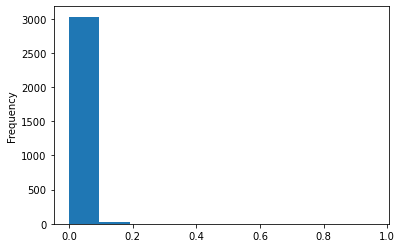

In [97]:
df_coll_f['PCIP01'].plot.hist()

#### Take a look at column values to ensure max and mins are appropriate (e.g. no percentage column show have a negative value or a value above 1)

In [56]:
df_coll_f.describe()

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,COMPL_RPY_3YR_RT_SUPP,DEBT_MDN,DEBT_MDN_SUPP,DEP_RPY_3YR_RT_SUPP,FEMALE_DEBT_MDN,FEMALE_RPY_3YR_RT_SUPP,FIRSTGEN_DEBT_MDN,FIRSTGEN_RPY_3YR_RT_SUPP,GRAD_DEBT_MDN,GRAD_DEBT_MDN10YR,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,IND_RPY_3YR_RT_SUPP,LATITUDE,LONGITUDE,LO_INC_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,MD_INC_DEBT_MDN,MD_INC_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,NOTFIRSTGEN_DEBT_MDN,NOTFIRSTGEN_RPY_3YR_RT_SUPP,OPEID,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,PCTFLOAN,PCTPELL,PELL_RPY_3YR_RT_SUPP,PPTUG_EF,PREDDEG,RPY_3YR_RT,RPY_3YR_RT_SUPP,UG25abv,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UNITID,WDRAW_DEBT_MDN,opeid6
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2.495000e+03,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.00000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,0.523802,0.311149,0.215439,0.155636,0.136936,0.776443,14164.428457,14164.428457,0.681954,14614.365731,0.656972,14424.959319,0.637394,21554.279559,239.296689,239.296689,21554.279559,0.606535,38.112263,-90.396549,0.582654,0.630888,15366.112625,0.698106,0.588550,0.746996,14023.887776,0.672024,1.853048e+06,0.426602,0.385938,0.040664,0.573398,0.005677,0.004266,0.001979,0.001584,0.020897,0.005146,0.048716,0.014399,0.043861,0.015821,0.030660,0.004021,0.009486,0.009455,0.012861,0.092053,0.000097,0.024968,0.005031,0.000159,0.015658,0.013931,0.003152,0.007109,0.006439,0.000912,0.03780,0.051584,0.014131,0.028430,0.002829,0.010285,0.003928,0.002635,0.047119,0.214796,0.179740,0.008383,0.584318,0.481754,0.599448,0.262998,2.572345,0.646992,0.646992,0.373042,0.025232,0.009769,0.033848,0.171309,0.122977,0.003486,0.019877,0.066204,0.547297,235438.726653,9408.752305,7307.979559
std,0.154160,0.173720,0.162855,0.142997,0.075983,0.158978,5467.747159,5467.747159,0.194103,5499.149488,0.201003,5662.392892,0.197189,7695.900073,85.440267,85.440267,7695.900073,0.187281,5.456170,15.606322,0.200407,0.207524,6108.614808,0.170062,0.198565,0.162620,5401.757428,0.196579,6.833081e+06,0.108847,0.091442,0.027895,0.108847,0.030012,0.017159,0.014878,0.014918,0.033297,0.035173,0.096033,0.073018,0.066361,0.060624,0.079872,0.008301,0.031076,0.033881,0.021251,0.163330,0.001347,0.038704,0.008804,0.005130,0.045486,0.027549,0.016571,0.053585,0.012809,0.007000,0.07304,0.075289,0.034313,0.049553,0.016079,0.047078,0.016696,0.023368,0.117728,0.245722,0.170312,0.013660,0.228997,0.194992,0.201001,0.225824,0.494838,0.201581,0.201581,0.242706,0.027241,0.028594,0.052724,0.199008,0.163825,0.015424,0.034335,0.106321,0.251547,110008.607997,3072.078822,8545.590285
min,0.179435,0.021505,0.013346,0.008283,0.006000,0.224490,2500.000000,2500.000000,0.137255,2000.000000,0.1

In [57]:
#https://stackoverflow.com/questions/13779526/finding-a-substring-within-a-list-in-python
l_pct_degree = [col for col in list(df_coll_f.columns) if 'PCIP' in col]
print('rows with percent degrees less than .999:', len(df_coll_f[l_pct_degree].sum(axis=1)[df_coll_f[l_pct_degree].sum(axis=1) < .999]))
print('rows with percent degrees greater than 1.001:', len(df_coll_f[l_pct_degree].sum(axis=1)[df_coll_f[l_pct_degree].sum(axis=1) > 1.001]))

rows with percent degrees less than .999: 0
rows with percent degrees greater than 1.001: 0


In [58]:
l_pct_race = [col for col in list(df_coll_f.columns) if 'UGDS' in col]
print('rows with percent race less than .999:', len(df_coll_f[l_pct_race].sum(axis=1)[df_coll_f[l_pct_race].sum(axis=1) < .999]))
print('rows with percent race greater than 1.001:', len(df_coll_f[l_pct_race].sum(axis=1)[df_coll_f[l_pct_degree].sum(axis=1) > 1.001]))

rows with percent race less than .999: 0
rows with percent race greater than 1.001: 0


In [59]:
df_colldd['NAME OF DATA ELEMENT'][df_colldd['NAME OF DATA ELEMENT'].isna()]

Series([], Name: NAME OF DATA ELEMENT, dtype: object)